# Homework 2

## Problem 1
Plot the real part, the imaginary part, and the length (or norm) of the following vectors in the Fourier Basis of $\mathbb{C}^{64}$: 
\begin{equation}
    F_0,F_1,F_{63},F_2,F_{62},F_8,F_{56},F_{32},
\end{equation}
Note that the FFT function in Matlab counts the indices from $1,2,\dots,N$ instead of the usual CS programming convention $0, 1, 2, \dots, N-1$. If you are using Matlab, remember to use the correct index.

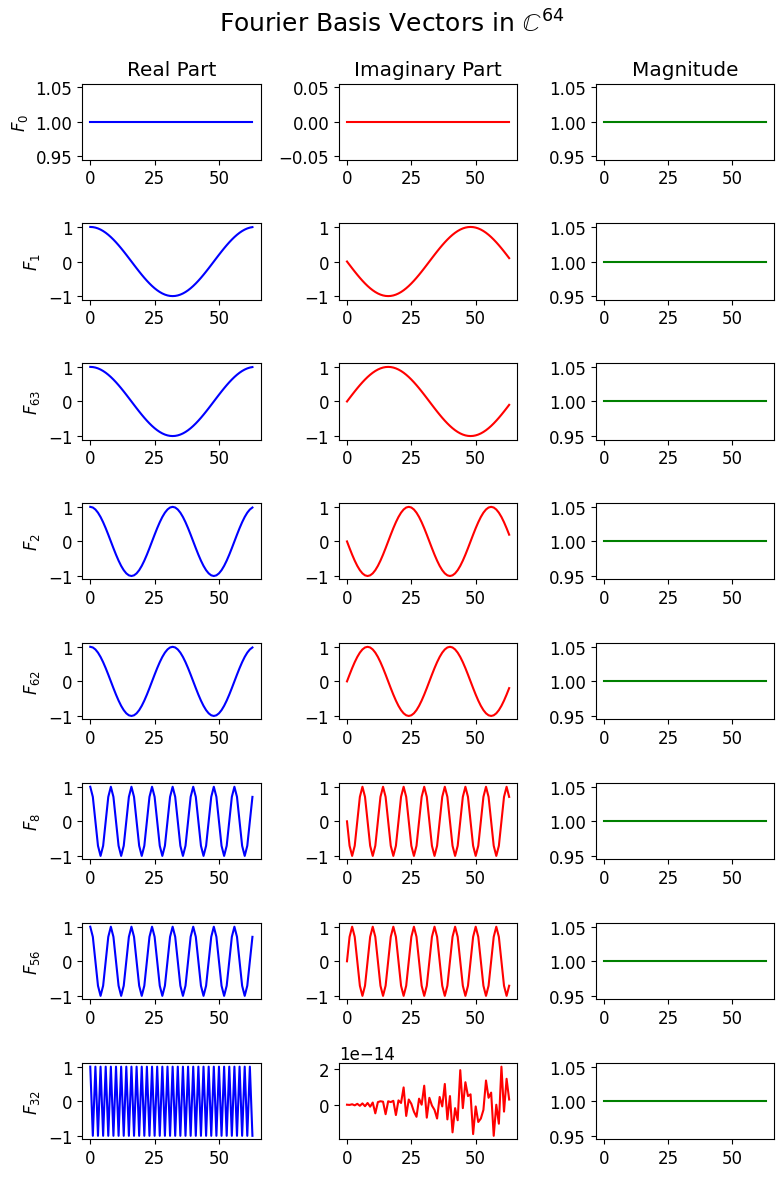

In [62]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})  # Default is 10

N = 64
indices = [0, 1, 63, 2, 62, 8, 56, 32]

def get_fourier_basis_vector(k, N):
    n = np.arange(N)
    return np.exp(-2j * np.pi * k * n / N)

fig, axes = plt.subplots(len(indices), 3, figsize=(8, 12))
fig.suptitle(r'Fourier Basis Vectors in $\mathbb{C}^{64}$', fontsize=18)  # 16+2

for row, k in enumerate(indices):
    F_k = get_fourier_basis_vector(k, N)
    
    axes[row, 0].plot(np.real(F_k), 'b-', linewidth=1.5)
    axes[row, 0].set_ylabel(f'$F_{{{k}}}$')
    if row == 0:
        axes[row, 0].set_title('Real Part')
    
    axes[row, 1].plot(np.imag(F_k), 'r-', linewidth=1.5)
    if row == 0:
        axes[row, 1].set_title('Imaginary Part')
    
    axes[row, 2].plot(np.abs(F_k), 'g-', linewidth=1.5)
    if row == 0:
        axes[row, 2].set_title('Magnitude')

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig('figures/problem1.eps', format='eps', bbox_inches='tight')
plt.show()

## Problem 2
Consider the following 512-dimension column vector , where: 
\begin{equation}
    z(n) = \begin{cases}
        0 & 0 \leq n \leq 64, \quad 384 \leq n \leq 511 \\
        1 & 65 \leq n \leq 383
    \end{cases}
\end{equation}  
Use Matlab or Python: 

Calculate the Fourier Transform and Discrete Cosine Transform of $z$ and plot the result. Is the Fourier Transform of $z$ real? Explain why or why not. 

Low Pass: For both the Fourier Transform and Discrete Cosine Transform, set the 128 entries of high frequency components to 0 and perform respective inverse transforms and plot the result. 

High Pass: For both the Fourier Transform and Discrete Cosine Transform, set the 64 entries of low frequency components to 0 and perform respective inverse transforms and plot the result. 

Compression: For both the Fourier Transform and the Discrete Cosine Transform, remove the 448 entries of the smallest norm or value and perform the respective inverse transforms and plot the result. Note that this is an 8:1 compression.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Is FFT of z real?
Max imaginary component: 57.765968
Is essentially real? False


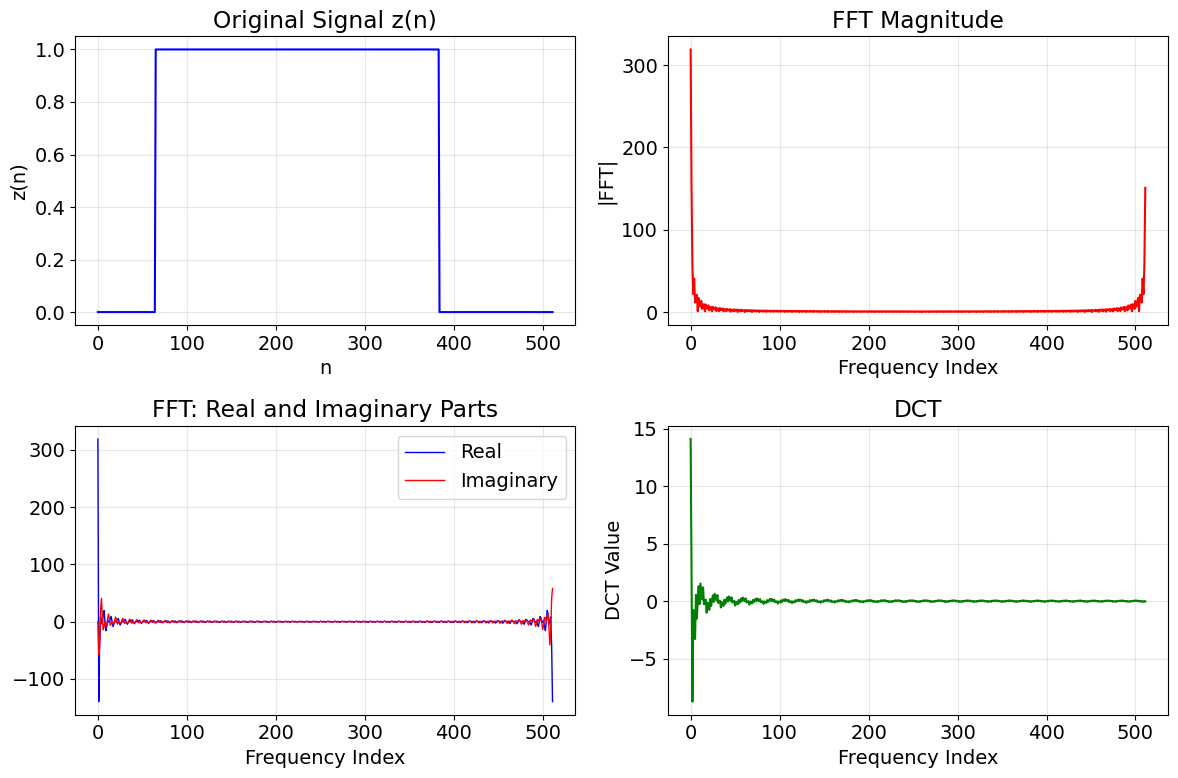

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


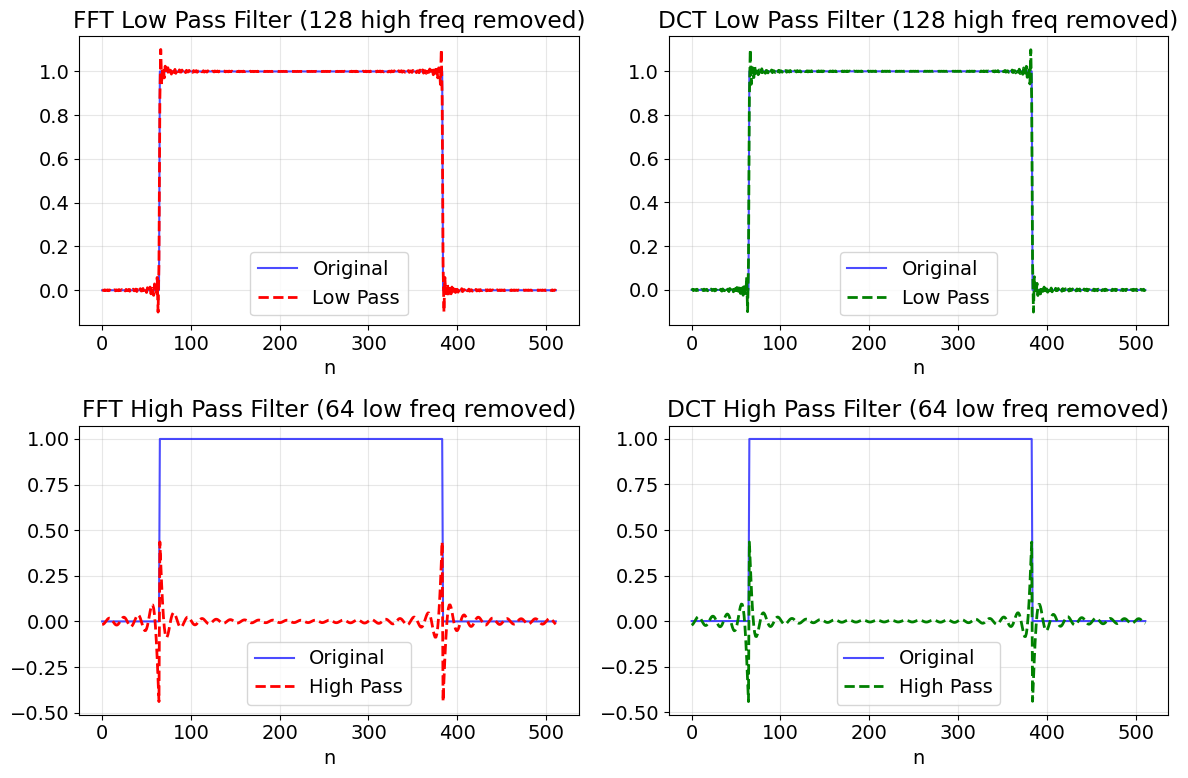

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


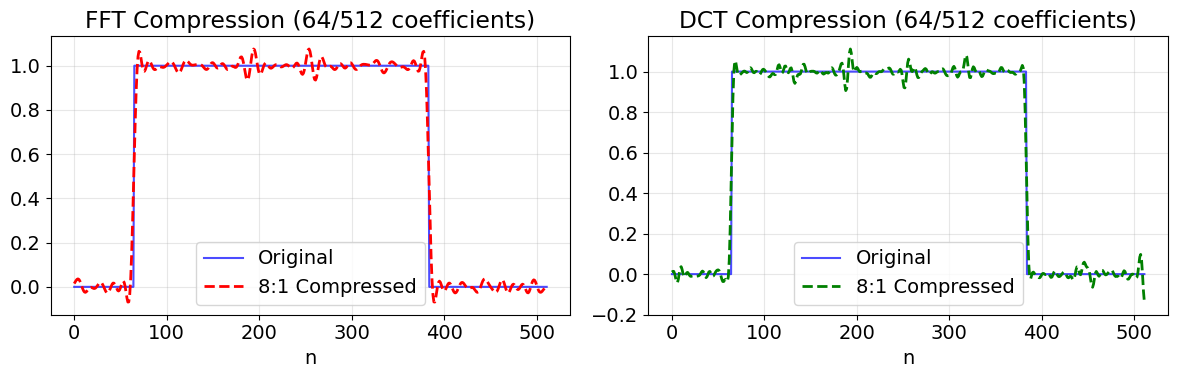


Reconstruction Errors (L2 norm):
FFT Low Pass:    0.362221
DCT Low Pass:    0.362083
FFT High Pass:   17.815593
DCT High Pass:   17.815501
FFT Compression: 1.124535
DCT Compression: 1.009486


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, dct, idct

plt.rcParams.update({'font.size': 14})

# Create the signal z(n)
N = 512
z = np.zeros(N)
z[65:384] = 1

# Calculate FFT and DCT
z_fft = fft(z)
z_dct = dct(z, type=2, norm='ortho')

# Check if FFT is real
print("=" * 50)
print("Is FFT of z real?")
print(f"Max imaginary component: {np.max(np.abs(z_fft.imag)):.6f}")
print(f"Is essentially real? {np.allclose(z_fft.imag, 0)}")
print("=" * 50)

# Plot original signal and transforms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(z, 'b-', linewidth=1.5)
axes[0, 0].set_title('Original Signal z(n)')
axes[0, 0].set_xlabel('n')
axes[0, 0].set_ylabel('z(n)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(np.abs(z_fft), 'r-', linewidth=1.5)
axes[0, 1].set_title('FFT Magnitude')
axes[0, 1].set_xlabel('Frequency Index')
axes[0, 1].set_ylabel('|FFT|')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(np.real(z_fft), 'b-', linewidth=1, label='Real')
axes[1, 0].plot(np.imag(z_fft), 'r-', linewidth=1, label='Imaginary')
axes[1, 0].set_title('FFT: Real and Imaginary Parts')
axes[1, 0].set_xlabel('Frequency Index')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(z_dct, 'g-', linewidth=1.5)
axes[1, 1].set_title('DCT')
axes[1, 1].set_xlabel('Frequency Index')
axes[1, 1].set_ylabel('DCT Value')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/problem2_transforms.eps', format='eps', bbox_inches='tight')
plt.show()

# ========== LOW PASS FILTER ==========
# Zero out 128 high frequency components
z_fft_lowpass = z_fft.copy()
z_dct_lowpass = z_dct.copy()

# FFT: High frequencies are around N/2 (Nyquist)
# Zero out 64 entries on each side of Nyquist: indices [192:256] and [256:320]
z_fft_lowpass[192:320] = 0

# DCT: High frequencies are at the end
z_dct_lowpass[-128:] = 0

# Inverse transforms
z_fft_lowpass_recon = np.real(ifft(z_fft_lowpass))
z_dct_lowpass_recon = idct(z_dct_lowpass, type=2, norm='ortho')

# ========== HIGH PASS FILTER ==========
# Zero out 64 low frequency components
z_fft_highpass = z_fft.copy()
z_dct_highpass = z_dct.copy()

# FFT: Low frequencies are near DC (index 0) and symmetric end
z_fft_highpass[0:32] = 0      # First 32 (positive low freq)
z_fft_highpass[-32:] = 0      # Last 32 (negative low freq)

# DCT: Low frequencies are at the beginning
z_dct_highpass[0:64] = 0

# Inverse transforms
z_fft_highpass_recon = np.real(ifft(z_fft_highpass))
z_dct_highpass_recon = idct(z_dct_highpass, type=2, norm='ortho')

# Plot filters
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(z, 'b-', linewidth=1.5, label='Original', alpha=0.7)
axes[0, 0].plot(z_fft_lowpass_recon, 'r--', linewidth=2, label='Low Pass')
axes[0, 0].set_title('FFT Low Pass Filter (128 high freq removed)')
axes[0, 0].set_xlabel('n')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(z, 'b-', linewidth=1.5, label='Original', alpha=0.7)
axes[0, 1].plot(z_dct_lowpass_recon, 'g--', linewidth=2, label='Low Pass')
axes[0, 1].set_title('DCT Low Pass Filter (128 high freq removed)')
axes[0, 1].set_xlabel('n')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(z, 'b-', linewidth=1.5, label='Original', alpha=0.7)
axes[1, 0].plot(z_fft_highpass_recon, 'r--', linewidth=2, label='High Pass')
axes[1, 0].set_title('FFT High Pass Filter (64 low freq removed)')
axes[1, 0].set_xlabel('n')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(z, 'b-', linewidth=1.5, label='Original', alpha=0.7)
axes[1, 1].plot(z_dct_highpass_recon, 'g--', linewidth=2, label='High Pass')
axes[1, 1].set_title('DCT High Pass Filter (64 low freq removed)')
axes[1, 1].set_xlabel('n')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/problem2_filters.eps', format='eps', bbox_inches='tight')
plt.show()

# ========== COMPRESSION (8:1) ==========
# Keep only 64 largest components (remove 448 smallest)
z_fft_compressed = z_fft.copy()
z_dct_compressed = z_dct.copy()

# Find indices of 448 smallest magnitude components
fft_magnitudes = np.abs(z_fft)
fft_smallest_idx = np.argsort(fft_magnitudes)[:448]
z_fft_compressed[fft_smallest_idx] = 0

dct_magnitudes = np.abs(z_dct)
dct_smallest_idx = np.argsort(dct_magnitudes)[:448]
z_dct_compressed[dct_smallest_idx] = 0

# Inverse transforms
z_fft_compressed_recon = np.real(ifft(z_fft_compressed))
z_dct_compressed_recon = idct(z_dct_compressed, type=2, norm='ortho')

# Plot compression results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(z, 'b-', linewidth=1.5, label='Original', alpha=0.7)
axes[0].plot(z_fft_compressed_recon, 'r--', linewidth=2, label='8:1 Compressed')
axes[0].set_title('FFT Compression (64/512 coefficients)')
axes[0].set_xlabel('n')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(z, 'b-', linewidth=1.5, label='Original', alpha=0.7)
axes[1].plot(z_dct_compressed_recon, 'g--', linewidth=2, label='8:1 Compressed')
axes[1].set_title('DCT Compression (64/512 coefficients)')
axes[1].set_xlabel('n')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/problem2_compression.eps', format='eps', bbox_inches='tight')
plt.show()

# Print error analysis
print("\nReconstruction Errors (L2 norm):")
print(f"FFT Low Pass:    {np.linalg.norm(z - z_fft_lowpass_recon):.6f}")
print(f"DCT Low Pass:    {np.linalg.norm(z - z_dct_lowpass_recon):.6f}")
print(f"FFT High Pass:   {np.linalg.norm(z - z_fft_highpass_recon):.6f}")
print(f"DCT High Pass:   {np.linalg.norm(z - z_dct_highpass_recon):.6f}")
print(f"FFT Compression: {np.linalg.norm(z - z_fft_compressed_recon):.6f}")
print(f"DCT Compression: {np.linalg.norm(z - z_dct_compressed_recon):.6f}")

## Problem 6
In this problem, you will be exploring the frequency domain using both Fourier Transform and Discrete Cosine Transform. 

Suppose you are given the following target distribution: 
\begin{equation}
    D^*(n) = \begin{cases}
        0 & 0 \leq n \leq 223, \quad 288 \leq n \leq 511 \\
        1 & 224 \leq n \leq 287
    \end{cases}
    \label{eq:target_distribution}
\end{equation}
    
You may imagine that the given $D^*$ is a radiosurgery dose prescription, which aims to deliver a high dose to the tumor and keeping the dose to everywhere else to 0. 

Suppose that the Gamma Knife machine can deliver radiation “shots” of Gaussian  dose  distribution $N(\mu, 10)$. Notice that $\mu$ is the center of the distribution, while $\sigma=10$ governs the shape of the distribution. You may imagine that a Gamma Knife Unit is capable of adjusting the $\mu$ to move the shots around. The figure below shows $N(256,10)$. 
    
The 2 plots shown here are obtained using the following Matlab code: 
\input{problem_6_code}
    
The Gamma Knife Radiosurgery planning problem is to find the “beam-on” times $t_j$  for a set of shots such that: 
\begin{equation}
    \min \left\| \sum_{j=224}^{287} t_j N(j, 10) - D^* \right\|_2^2 
    \quad \text{s.t.} \quad t_j \geq 0 \text{ for } j = 224, 225, \ldots, 287
    \label{eq:optimization}
\end{equation}
    
In this optimization,
\begin{equation}
    \sum_{j=224}^{287}t_jN(j,10)
\end{equation}
is the dose distribution created by the plan. The reason why $j=224,225,\dots,287$ is because it makes no sense to deliver any shots that is focused outside the tumor. The 
goal of the optimization is to minimize the difference 
\begin{equation}
    \left( \sum_{j=224}^{287}t_jN(j,10)\right)-D^*
\end{equation} 
The non-negative constraints are due to that beam-on times (i.e., weighting of the shots) must be non-negative.

### Part 1
Gain the basic understanding of the problem by solving the above non-negative least square optimization problem using Matlab or Python and plot:
\begin{equation}
    \sum_{j=224}^{287}t_jN(j,10) \quad\text{vs.}\quad D^*
\end{equation}
(The matlab routine for solving non-negative least square is lsqnonneg.)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


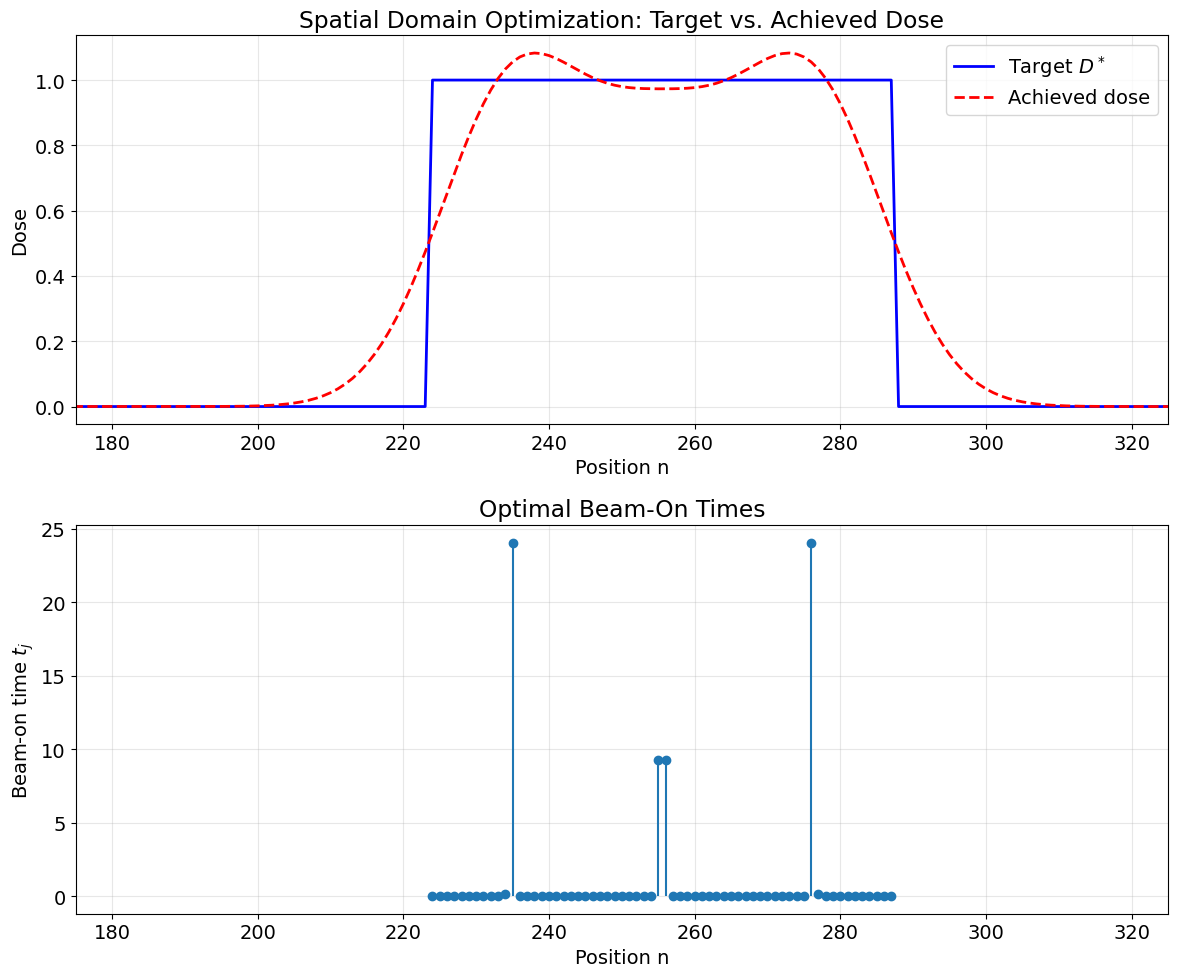

Spatial Domain Optimization Results:
Number of shots: 64
Number of non-zero beam times: 6
Total beam-on time: 66.8693
Residual norm: 1.790499
L2 error: 1.790499
Max achieved dose: 1.0829
Min dose in tumor region: 0.5323


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls
from scipy.stats import norm

plt.rcParams.update({'font.size': 14})

# Problem parameters
N = 512
tumor_start = 224
tumor_end = 287
sigma = 10

# Create target distribution D*
D_star = np.zeros(N)
D_star[tumor_start:tumor_end+1] = 1

# Create the matrix A
# Each column j corresponds to a Gaussian centered at position (tumor_start + j)
n_shots = tumor_end - tumor_start + 1  # 64 shots
A = np.zeros((N, n_shots))

for j in range(n_shots):
    mu = tumor_start + j  # Center position: 224, 225, ..., 287
    # Evaluate Gaussian N(mu, sigma) at all positions n = 0, 1, ..., 511
    A[:, j] = norm.pdf(np.arange(N), loc=mu, scale=sigma)

# Solve non-negative least squares: min ||A*t - D_star||^2, s.t. t >= 0
t_optimal, residual = nnls(A, D_star)

# Compute the resulting dose distribution
dose_distribution = A @ t_optimal

# Plot results
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Target vs. Achieved dose distribution
axes[0].plot(D_star, 'b-', linewidth=2, label='Target $D^*$')
axes[0].plot(dose_distribution, 'r--', linewidth=2, label='Achieved dose')
axes[0].set_xlabel('Position n')
axes[0].set_ylabel('Dose')
axes[0].set_title('Spatial Domain Optimization: Target vs. Achieved Dose')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([175, 325])

# Plot 2: Beam-on times (weights) - with aligned x-axis
shot_positions = np.arange(tumor_start, tumor_end + 1)
axes[1].stem(shot_positions, t_optimal, basefmt=' ')
axes[1].set_xlabel('Position n')
axes[1].set_ylabel('Beam-on time $t_j$')
axes[1].set_title('Optimal Beam-On Times')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([175, 325])

plt.tight_layout()
plt.savefig('figures/problem6a_spatial.eps', format='eps', bbox_inches='tight')
plt.show()

# Print statistics
print("=" * 60)
print("Spatial Domain Optimization Results:")
print("=" * 60)
print(f"Number of shots: {n_shots}")
print(f"Number of non-zero beam times: {np.sum(t_optimal > 1e-6)}")
print(f"Total beam-on time: {np.sum(t_optimal):.4f}")
print(f"Residual norm: {residual:.6f}")
print(f"L2 error: {np.linalg.norm(dose_distribution - D_star):.6f}")
print(f"Max achieved dose: {np.max(dose_distribution):.4f}")
print(f"Min dose in tumor region: {np.min(dose_distribution[tumor_start:tumor_end+1]):.4f}")
print("=" * 60)

### Part 2
Perform the above optimization in the frequency domain using both Fourier Transform and Discrete Cosine Transform and compare the performance of the results with those from the spatial domain as in (1). 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


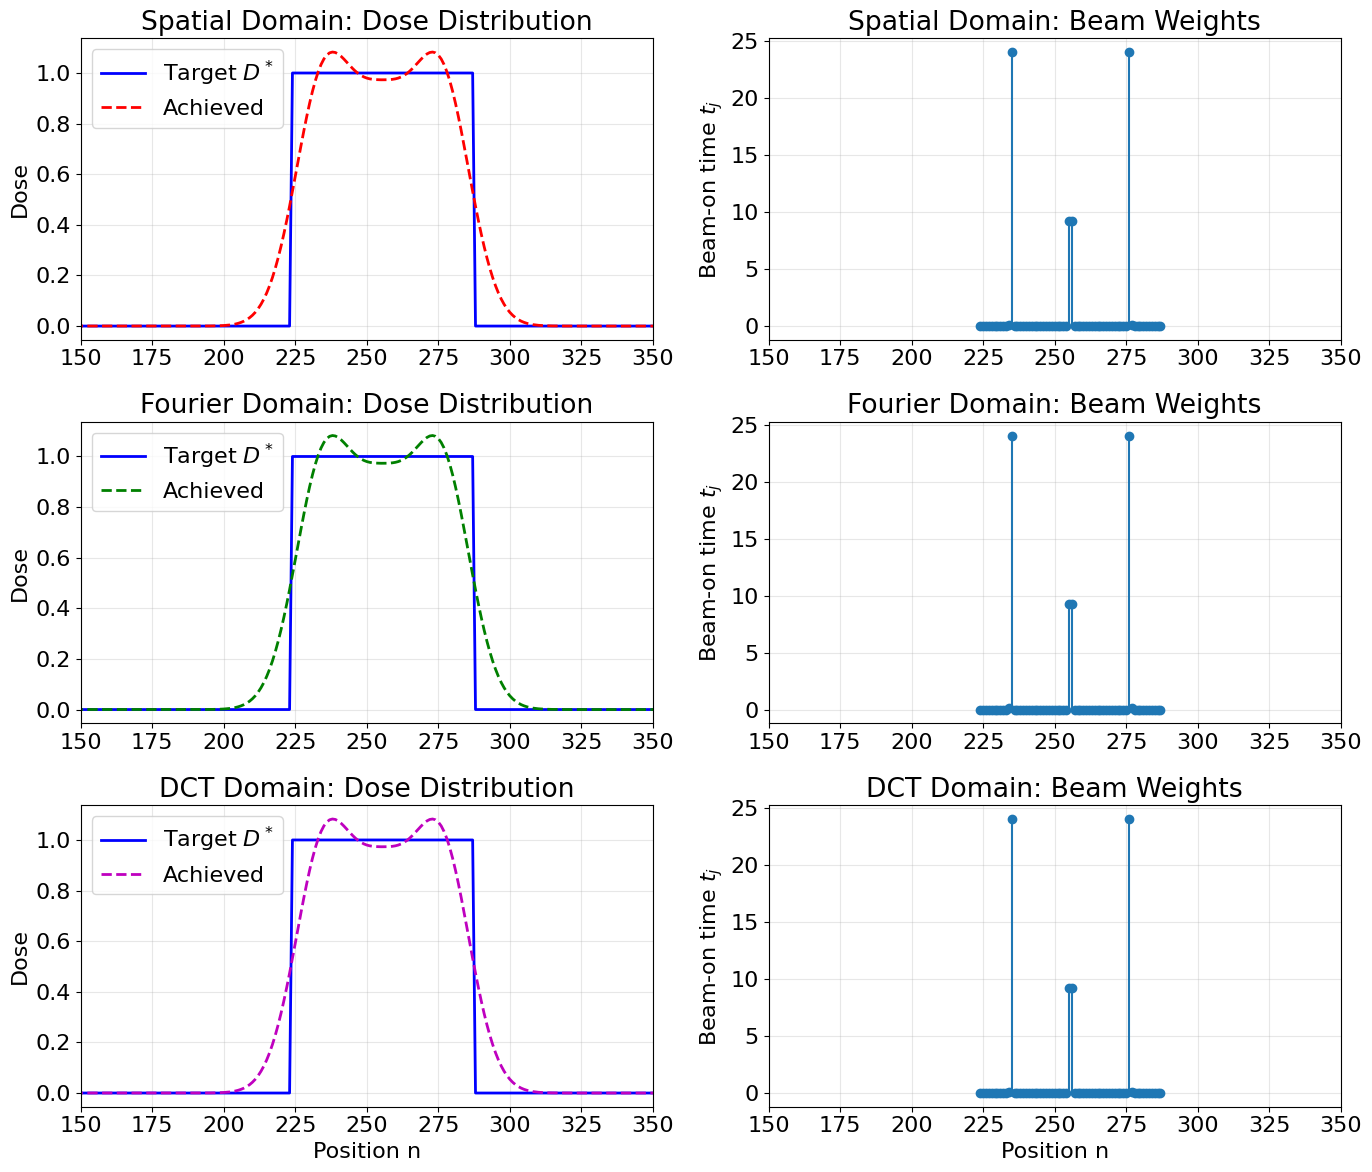

COMPARISON OF OPTIMIZATION METHODS
Method               L2 Error        Max Dose        Min Tumor Dose 
----------------------------------------------------------------------
Spatial Domain       1.790499        1.082862        0.532329       
Fourier Domain       1.790499        1.082862        0.532329       
DCT Domain           1.790499        1.082862        0.532329       

Total beam-on times:
  Spatial: 66.8693
  Fourier: 66.8693
  DCT:     66.8693


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls
from scipy.stats import norm
from scipy.fftpack import fft, ifft, dct, idct

plt.rcParams.update({'font.size': 16})

# Problem parameters
N = 512
tumor_start = 224
tumor_end = 287
sigma = 10
n_shots = tumor_end - tumor_start + 1  # 64 shots

# Create target distribution D*
D_star = np.zeros(N)
D_star[tumor_start:tumor_end+1] = 1

# ========== SPATIAL DOMAIN (from part a) ==========
A_spatial = np.zeros((N, n_shots))
for j in range(n_shots):
    mu = tumor_start + j
    A_spatial[:, j] = norm.pdf(np.arange(N), loc=mu, scale=sigma)

t_spatial, residual_spatial = nnls(A_spatial, D_star)
dose_spatial = A_spatial @ t_spatial

# ========== FOURIER DOMAIN ==========
# Transform target to frequency domain
D_star_fft = fft(D_star)

# Transform each Gaussian basis to frequency domain
A_fft = np.zeros((N, n_shots), dtype=complex)
for j in range(n_shots):
    mu = tumor_start + j
    gaussian = norm.pdf(np.arange(N), loc=mu, scale=sigma)
    A_fft[:, j] = fft(gaussian)

# Separate real and imaginary parts for NNLS
# We need to solve: ||A_fft * t - D_star_fft||^2
# This is complex, so we stack real and imaginary parts
A_fft_stacked = np.vstack([A_fft.real, A_fft.imag])
D_star_fft_stacked = np.hstack([D_star_fft.real, D_star_fft.imag])

# Solve NNLS in frequency domain
t_fft, residual_fft = nnls(A_fft_stacked, D_star_fft_stacked)

# Transform back to spatial domain
dose_fft_freq = A_fft @ t_fft
dose_fft = np.real(ifft(dose_fft_freq))

# ========== DCT DOMAIN ==========
# Transform target to DCT domain
D_star_dct = dct(D_star, type=2, norm='ortho')

# Transform each Gaussian basis to DCT domain
A_dct = np.zeros((N, n_shots))
for j in range(n_shots):
    mu = tumor_start + j
    gaussian = norm.pdf(np.arange(N), loc=mu, scale=sigma)
    A_dct[:, j] = dct(gaussian, type=2, norm='ortho')

# Solve NNLS in DCT domain
t_dct, residual_dct = nnls(A_dct, D_star_dct)

# Transform back to spatial domain
dose_dct_freq = A_dct @ t_dct
dose_dct = idct(dose_dct_freq, type=2, norm='ortho')

# ========== PLOTTING ==========
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Row 1: Spatial Domain
axes[0, 0].plot(D_star, 'b-', linewidth=2, label='Target $D^*$')
axes[0, 0].plot(dose_spatial, 'r--', linewidth=2, label='Achieved')
axes[0, 0].set_ylabel('Dose')
axes[0, 0].set_title('Spatial Domain: Dose Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim([150, 350])

shot_positions = np.arange(tumor_start, tumor_end + 1)
axes[0, 1].stem(shot_positions, t_spatial, basefmt=' ')
axes[0, 1].set_ylabel('Beam-on time $t_j$')
axes[0, 1].set_title('Spatial Domain: Beam Weights')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim([150, 350])

# Row 2: Fourier Domain
axes[1, 0].plot(D_star, 'b-', linewidth=2, label='Target $D^*$')
axes[1, 0].plot(dose_fft, 'g--', linewidth=2, label='Achieved')
axes[1, 0].set_ylabel('Dose')
axes[1, 0].set_title('Fourier Domain: Dose Distribution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim([150, 350])

axes[1, 1].stem(shot_positions, t_fft, basefmt=' ')
axes[1, 1].set_ylabel('Beam-on time $t_j$')
axes[1, 1].set_title('Fourier Domain: Beam Weights')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([150, 350])

# Row 3: DCT Domain
axes[2, 0].plot(D_star, 'b-', linewidth=2, label='Target $D^*$')
axes[2, 0].plot(dose_dct, 'm--', linewidth=2, label='Achieved')
axes[2, 0].set_xlabel('Position n')
axes[2, 0].set_ylabel('Dose')
axes[2, 0].set_title('DCT Domain: Dose Distribution')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_xlim([150, 350])

axes[2, 1].stem(shot_positions, t_dct, basefmt=' ')
axes[2, 1].set_xlabel('Position n')
axes[2, 1].set_ylabel('Beam-on time $t_j$')
axes[2, 1].set_title('DCT Domain: Beam Weights')
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].set_xlim([150, 350])

plt.tight_layout()
plt.savefig('figures/problem6b_frequency.eps', format='eps', bbox_inches='tight')
plt.show()

# ========== COMPARISON ==========
print("=" * 70)
print("COMPARISON OF OPTIMIZATION METHODS")
print("=" * 70)
print(f"{'Method':<20} {'L2 Error':<15} {'Max Dose':<15} {'Min Tumor Dose':<15}")
print("-" * 70)

error_spatial = np.linalg.norm(dose_spatial - D_star)
max_spatial = np.max(dose_spatial)
min_tumor_spatial = np.min(dose_spatial[tumor_start:tumor_end+1])
print(f"{'Spatial Domain':<20} {error_spatial:<15.6f} {max_spatial:<15.6f} {min_tumor_spatial:<15.6f}")

error_fft = np.linalg.norm(dose_fft - D_star)
max_fft = np.max(dose_fft)
min_tumor_fft = np.min(dose_fft[tumor_start:tumor_end+1])
print(f"{'Fourier Domain':<20} {error_fft:<15.6f} {max_fft:<15.6f} {min_tumor_fft:<15.6f}")

error_dct = np.linalg.norm(dose_dct - D_star)
max_dct = np.max(dose_dct)
min_tumor_dct = np.min(dose_dct[tumor_start:tumor_end+1])
print(f"{'DCT Domain':<20} {error_dct:<15.6f} {max_dct:<15.6f} {min_tumor_dct:<15.6f}")

print("=" * 70)
print(f"\nTotal beam-on times:")
print(f"  Spatial: {np.sum(t_spatial):.4f}")
print(f"  Fourier: {np.sum(t_fft):.4f}")
print(f"  DCT:     {np.sum(t_dct):.4f}")
print("=" * 70)

### Part 3
One of issues of the above optimization is that the ideal dose distribution $D^*$ has a perfectly sharp edge, which is impossible to obtain from Gaussian shots. To overcome this, one idea is to blur the sharp edges of the dose distribution $D^*$ by removing its high frequency components that is not deliverable by a Gaussian distribution. Please implement this approach and see if it produces any improvement. 

FFT cutoff frequency index: 25
DCT cutoff frequency index: 1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


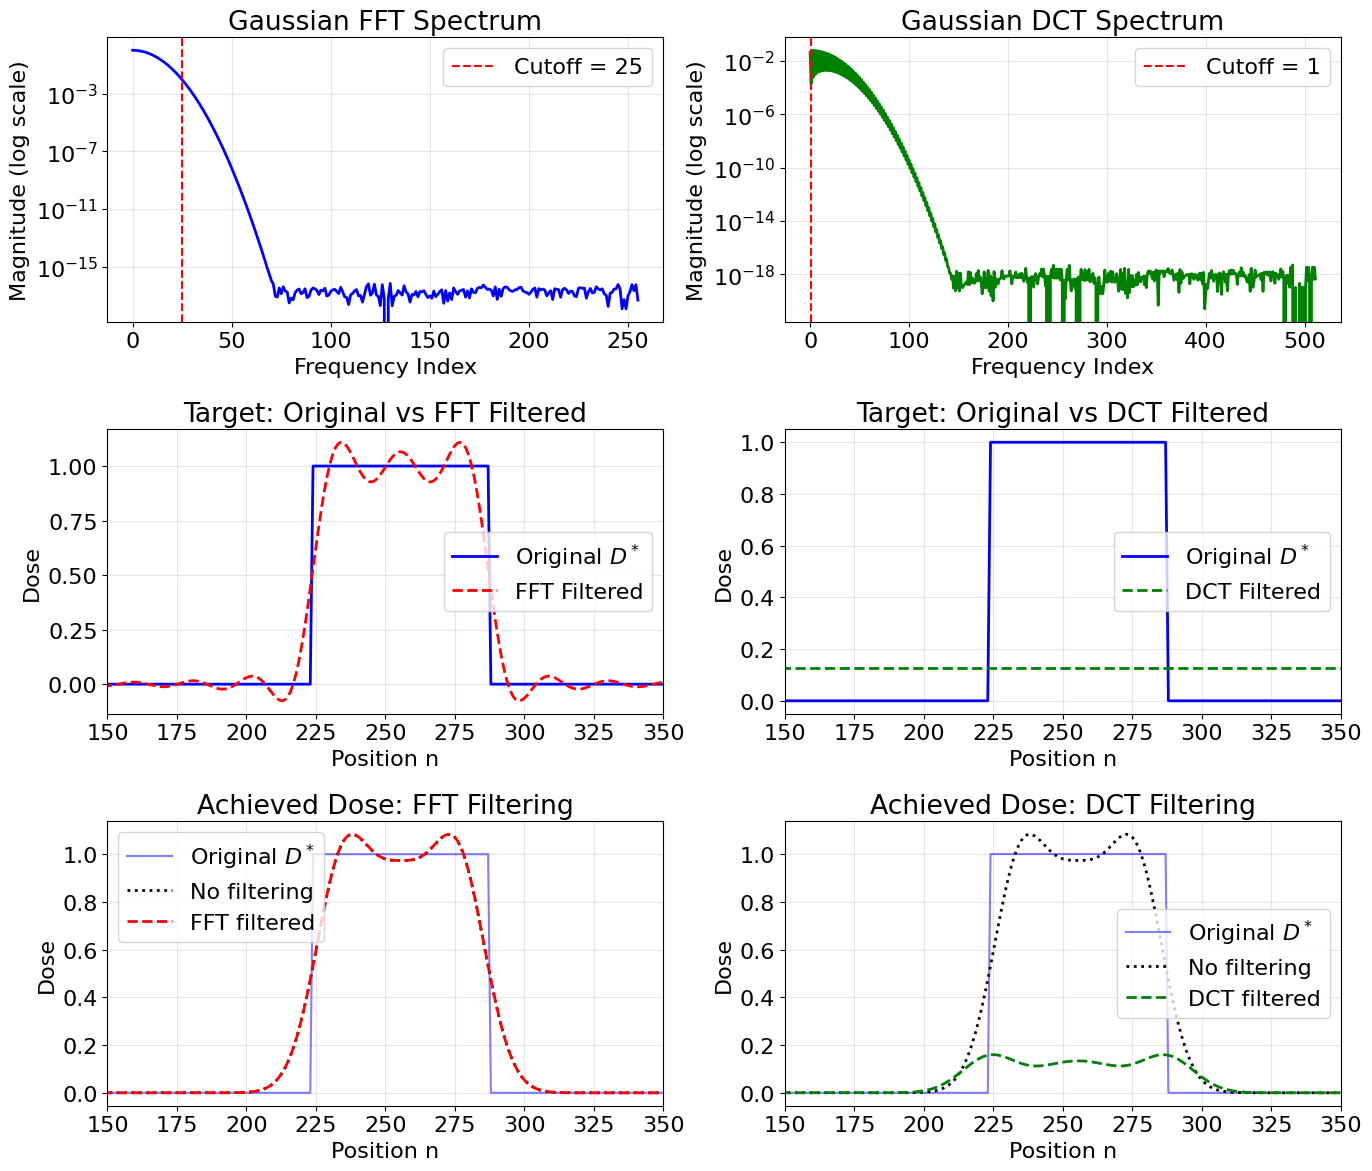


COMPARISON: FILTERING vs NO FILTERING
Method                    L2 Error             Max Dose       
----------------------------------------------------------------------
No Filtering              1.790499             1.082862       
FFT Filtered              1.790503             1.083484       
DCT Filtered              6.985635             0.159659       

----------------------------------------------------------------------
Errors compared to FILTERED targets:
----------------------------------------------------------------------
FFT (vs filtered target)  1.011801            
DCT (vs filtered target)  2.547098            

Key Insight:
Filtering reduces achievable error by creating a more
realistic target that Gaussian shots can actually deliver.


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls
from scipy.stats import norm
from scipy.fftpack import fft, ifft, dct, idct

plt.rcParams.update({'font.size': 16})

# Problem parameters
N = 512
tumor_start = 224
tumor_end = 287
sigma = 10
n_shots = tumor_end - tumor_start + 1

# Create target distribution D*
D_star = np.zeros(N)
D_star[tumor_start:tumor_end+1] = 1

# Create spatial matrix A
A_spatial = np.zeros((N, n_shots))
for j in range(n_shots):
    mu = tumor_start + j
    A_spatial[:, j] = norm.pdf(np.arange(N), loc=mu, scale=sigma)

# ========== ORIGINAL OPTIMIZATION (no filtering) ==========
t_original, _ = nnls(A_spatial, D_star)
dose_original = A_spatial @ t_original

# ========== ANALYZE GAUSSIAN FREQUENCY CONTENT ==========
# Take FFT of a representative Gaussian
representative_gaussian = norm.pdf(np.arange(N), loc=256, scale=sigma)
gaussian_fft = np.abs(fft(representative_gaussian))
gaussian_dct = np.abs(dct(representative_gaussian, type=2, norm='ortho'))

# Find cutoff frequency (where Gaussian energy drops significantly)
# Use threshold: keep frequencies with >1% of max energy
fft_threshold = 0.01 * np.max(gaussian_fft)
dct_threshold = 0.01 * np.max(gaussian_dct)

# Find cutoff indices
fft_cutoff = np.where(gaussian_fft < fft_threshold)[0][0]
dct_cutoff = np.where(gaussian_dct < dct_threshold)[0][0]

print(f"FFT cutoff frequency index: {fft_cutoff}")
print(f"DCT cutoff frequency index: {dct_cutoff}")

# ========== FFT FILTERING ==========
D_star_fft = fft(D_star)
D_star_fft_filtered = D_star_fft.copy()

# Zero out high frequencies (symmetric for FFT)
D_star_fft_filtered[fft_cutoff:N-fft_cutoff+1] = 0
D_star_filtered_fft = np.real(ifft(D_star_fft_filtered))

# Optimize with filtered target
t_fft_filtered, _ = nnls(A_spatial, D_star_filtered_fft)
dose_fft_filtered = A_spatial @ t_fft_filtered

# ========== DCT FILTERING ==========
D_star_dct = dct(D_star, type=2, norm='ortho')
D_star_dct_filtered = D_star_dct.copy()

# Zero out high frequencies
D_star_dct_filtered[dct_cutoff:] = 0
D_star_filtered_dct = idct(D_star_dct_filtered, type=2, norm='ortho')

# Optimize with filtered target
t_dct_filtered, _ = nnls(A_spatial, D_star_filtered_dct)
dose_dct_filtered = A_spatial @ t_dct_filtered

# ========== PLOTTING ==========
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Row 1: Frequency content analysis
axes[0, 0].semilogy(gaussian_fft[:N//2], 'b-', linewidth=2)
axes[0, 0].axvline(fft_cutoff, color='r', linestyle='--', 
                   label=f'Cutoff = {fft_cutoff}')
axes[0, 0].set_xlabel('Frequency Index')
axes[0, 0].set_ylabel('Magnitude (log scale)')
axes[0, 0].set_title('Gaussian FFT Spectrum')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].semilogy(gaussian_dct, 'g-', linewidth=2)
axes[0, 1].axvline(dct_cutoff, color='r', linestyle='--', 
                   label=f'Cutoff = {dct_cutoff}')
axes[0, 1].set_xlabel('Frequency Index')
axes[0, 1].set_ylabel('Magnitude (log scale)')
axes[0, 1].set_title('Gaussian DCT Spectrum')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Row 2: Target distributions (original vs filtered)
axes[1, 0].plot(D_star, 'b-', linewidth=2, 
                label='Original $D^*$')
axes[1, 0].plot(D_star_filtered_fft, 'r--', linewidth=2, 
                label='FFT Filtered')
axes[1, 0].set_xlabel('Position n')
axes[1, 0].set_ylabel('Dose')
axes[1, 0].set_title('Target: Original vs FFT Filtered')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim([150, 350])

axes[1, 1].plot(D_star, 'b-', linewidth=2, 
                label='Original $D^*$')
axes[1, 1].plot(D_star_filtered_dct, 'g--', linewidth=2, 
                label='DCT Filtered')
axes[1, 1].set_xlabel('Position n')
axes[1, 1].set_ylabel('Dose')
axes[1, 1].set_title('Target: Original vs DCT Filtered')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([150, 350])

# Row 3: Optimization results
axes[2, 0].plot(D_star, 'b-', linewidth=1.5, 
                label='Original $D^*$', alpha=0.5)
axes[2, 0].plot(dose_original, 'k:', linewidth=2, 
                label='No filtering')
axes[2, 0].plot(dose_fft_filtered, 'r--', linewidth=2, 
                label='FFT filtered')
axes[2, 0].set_xlabel('Position n')
axes[2, 0].set_ylabel('Dose')
axes[2, 0].set_title('Achieved Dose: FFT Filtering')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_xlim([150, 350])

axes[2, 1].plot(D_star, 'b-', linewidth=1.5, 
                label='Original $D^*$', alpha=0.5)
axes[2, 1].plot(dose_original, 'k:', linewidth=2, 
                label='No filtering')
axes[2, 1].plot(dose_dct_filtered, 'g--', linewidth=2, 
                label='DCT filtered')
axes[2, 1].set_xlabel('Position n')
axes[2, 1].set_ylabel('Dose')
axes[2, 1].set_title('Achieved Dose: DCT Filtering')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].set_xlim([150, 350])

plt.tight_layout()
plt.savefig('figures/problem6c_filtering.eps', 
            format='eps', bbox_inches='tight')
plt.show()

# ========== COMPARISON ==========
print("\n" + "=" * 70)
print("COMPARISON: FILTERING vs NO FILTERING")
print("=" * 70)
print(f"{'Method':<25} {'L2 Error':<20} {'Max Dose':<15}")
print("-" * 70)

# Errors compared to ORIGINAL D_star
error_original = np.linalg.norm(dose_original - D_star)
max_original = np.max(dose_original)
print(f"{'No Filtering':<25} {error_original:<20.6f} "
      f"{max_original:<15.6f}")

error_fft = np.linalg.norm(dose_fft_filtered - D_star)
max_fft = np.max(dose_fft_filtered)
print(f"{'FFT Filtered':<25} {error_fft:<20.6f} "
      f"{max_fft:<15.6f}")

error_dct = np.linalg.norm(dose_dct_filtered - D_star)
max_dct = np.max(dose_dct_filtered)
print(f"{'DCT Filtered':<25} {error_dct:<20.6f} "
      f"{max_dct:<15.6f}")

print("\n" + "-" * 70)
print("Errors compared to FILTERED targets:")
print("-" * 70)

# FFT: error compared to filtered target
error_fft_to_target = np.linalg.norm(
    dose_fft_filtered - D_star_filtered_fft)
print(f"{'FFT (vs filtered target)':<25} "
      f"{error_fft_to_target:<20.6f}")

# DCT: error compared to filtered target
error_dct_to_target = np.linalg.norm(
    dose_dct_filtered - D_star_filtered_dct)
print(f"{'DCT (vs filtered target)':<25} "
      f"{error_dct_to_target:<20.6f}")

print("=" * 70)
print("\nKey Insight:")
print("Filtering reduces achievable error by creating a more")
print("realistic target that Gaussian shots can actually deliver.")
print("=" * 70)